In [122]:
import keras
import pandas 
import numpy as np
import seaborn as sns
import tensorflow as tf
from keras import activations
import matplotlib.pyplot as plt
from keras.models import Sequential 
from sklearn.metrics import r2_score 
from keras.layers import Dense , Flatten
from sklearn.linear_model import Perceptron

In [123]:
df_train = pandas.read_csv('Regression/train.csv')
df_test = pandas.read_csv('Regression/test.csv')
df_test.dropna(inplace=True)
df_train.dropna(inplace=True)
df_train.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


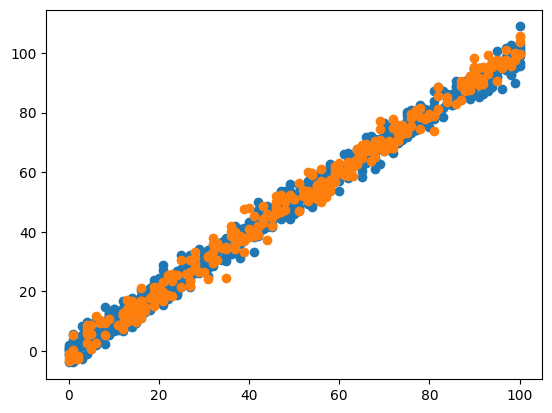

In [124]:
plt.scatter(df_train['x'],df_train['y']);
plt.scatter(df_test['x'],df_test['y']);

In [125]:
model = keras.Sequential([ 
    keras.layers.Dense(1, input_shape=(1,), 
                       activation='linear') 
]) 

In [126]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [127]:
model.compile( 
    optimizer='adam', 
    loss='mse', 
    metrics=['accuracy']) 

In [128]:
history = model.fit(df_train['x'].to_numpy().reshape(-1, 1),df_train['y'].to_numpy().reshape(-1, 1), epochs=50 , validation_split=0.2)

Epoch 1/50


18/18 [==============================] - 1s 14ms/step - loss: 1475.8422 - accuracy: 0.0000e+00 - val_loss: 1580.9420 - val_accuracy: 0.0000e+00
Epoch 2/50
18/18 [==============================] - 0s 8ms/step - loss: 1398.7623 - accuracy: 0.0000e+00 - val_loss: 1496.9064 - val_accuracy: 0.0000e+00
Epoch 3/50
18/18 [==============================] - 0s 7ms/step - loss: 1323.8464 - accuracy: 0.0000e+00 - val_loss: 1416.3926 - val_accuracy: 0.0000e+00
Epoch 4/50
18/18 [==============================] - 0s 8ms/step - loss: 1251.2637 - accuracy: 0.0000e+00 - val_loss: 1339.8792 - val_accuracy: 0.0000e+00
Epoch 5/50
18/18 [==============================] - 0s 8ms/step - loss: 1183.2753 - accuracy: 0.0000e+00 - val_loss: 1264.7970 - val_accuracy: 0.0000e+00
Epoch 6/50
18/18 [==============================] - 0s 8ms/step - loss: 1116.9008 - accuracy: 0.0000e+00 - val_loss: 1193.1705 - val_accuracy: 0.0000e+00
Epoch 7/50
18/18 [==============================] - 0s 7ms/step - loss: 1053.4678 - ac

Text(0.5, 1.0, 'loss curve')

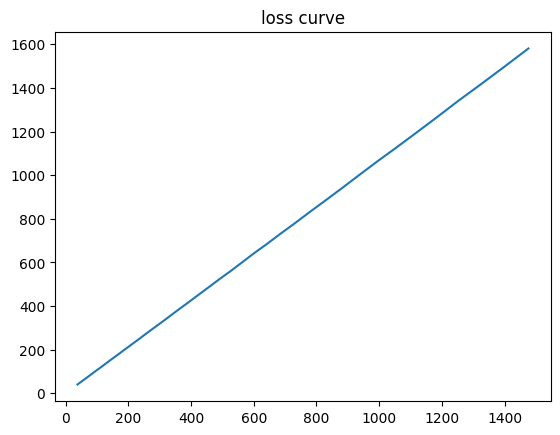

In [134]:
plt.plot(history.history['loss'] ,history.history['val_loss'] )
plt.title('loss curve')

In [130]:
y_pred =  model.predict(df_test['x'].to_numpy().reshape(-1,1))

10/10 [==============================] - 0s 2ms/step


In [131]:
r2_score(df_test['y'].to_numpy() , y_pred)

0.947026273875812

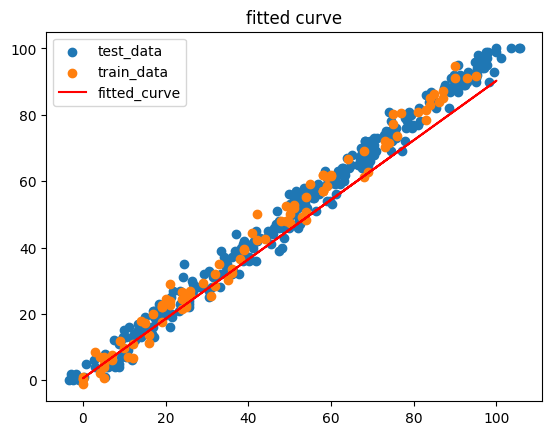

In [144]:
plt.scatter(df_test['y'] , df_test['x'] , label='test_data')
plt.scatter(df_train['x'].head(100),df_train['y'].head(100) , label='train_data')
plt.plot(df_test['x'].to_numpy() , y_pred , 'red' , label='fitted_curve')
plt.title('fitted curve')
plt.legend()
plt.show()